## Classical and quantum simulations on the Nitrogen molecule


In the strongly correlated regime, the classical algorithm CCSD breaks down. It is interesting how its quantum counterpart q-UCCSD performs, and in the paper by Sokolov et. al. [[1]](#rsc) it is found that the quantum algorithm implemented on a quantum computer simulator performs better, and reproduces the qualitative behavior of the energy as a function of the bond length of $N_2$. However, the deviation from the exact results are still not within chemical accuracy, at least not the results from the simulations run on a computer with only 8 GB RAM.

An important factor for the computational cost is how many orbitals that are used in the simulations. Currently, we have a good understanding of the frozen core approximation, and which orbitals to remove. It is possible to further taper off qubits, as done in the paper by Sokolov et. al., but this is currently only partially implemented. 

The simulations presented here are computationally demanding. It is expected that reruns on computers with more RAM (more than 8 GB), will be produce better results.

The classical results here are calculated using the psi4 library, via the openfermion library. Experimenting with other, hopefully slightly more user friendly, libraries should also be done in the future. 

In [1]:
from quantum_chem_VQE_N2 import *
from qiskit import BasicAer
import numpy as np

backend = BasicAer.get_backend("statevector_simulator")
driver = "PYSCF"

    
newparams = {'figure.figsize': (10, 7), 'axes.grid': False,
             'lines.markersize': 10, 'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral', 'figure.dpi': 200}
plt.rcParams.update(newparams)

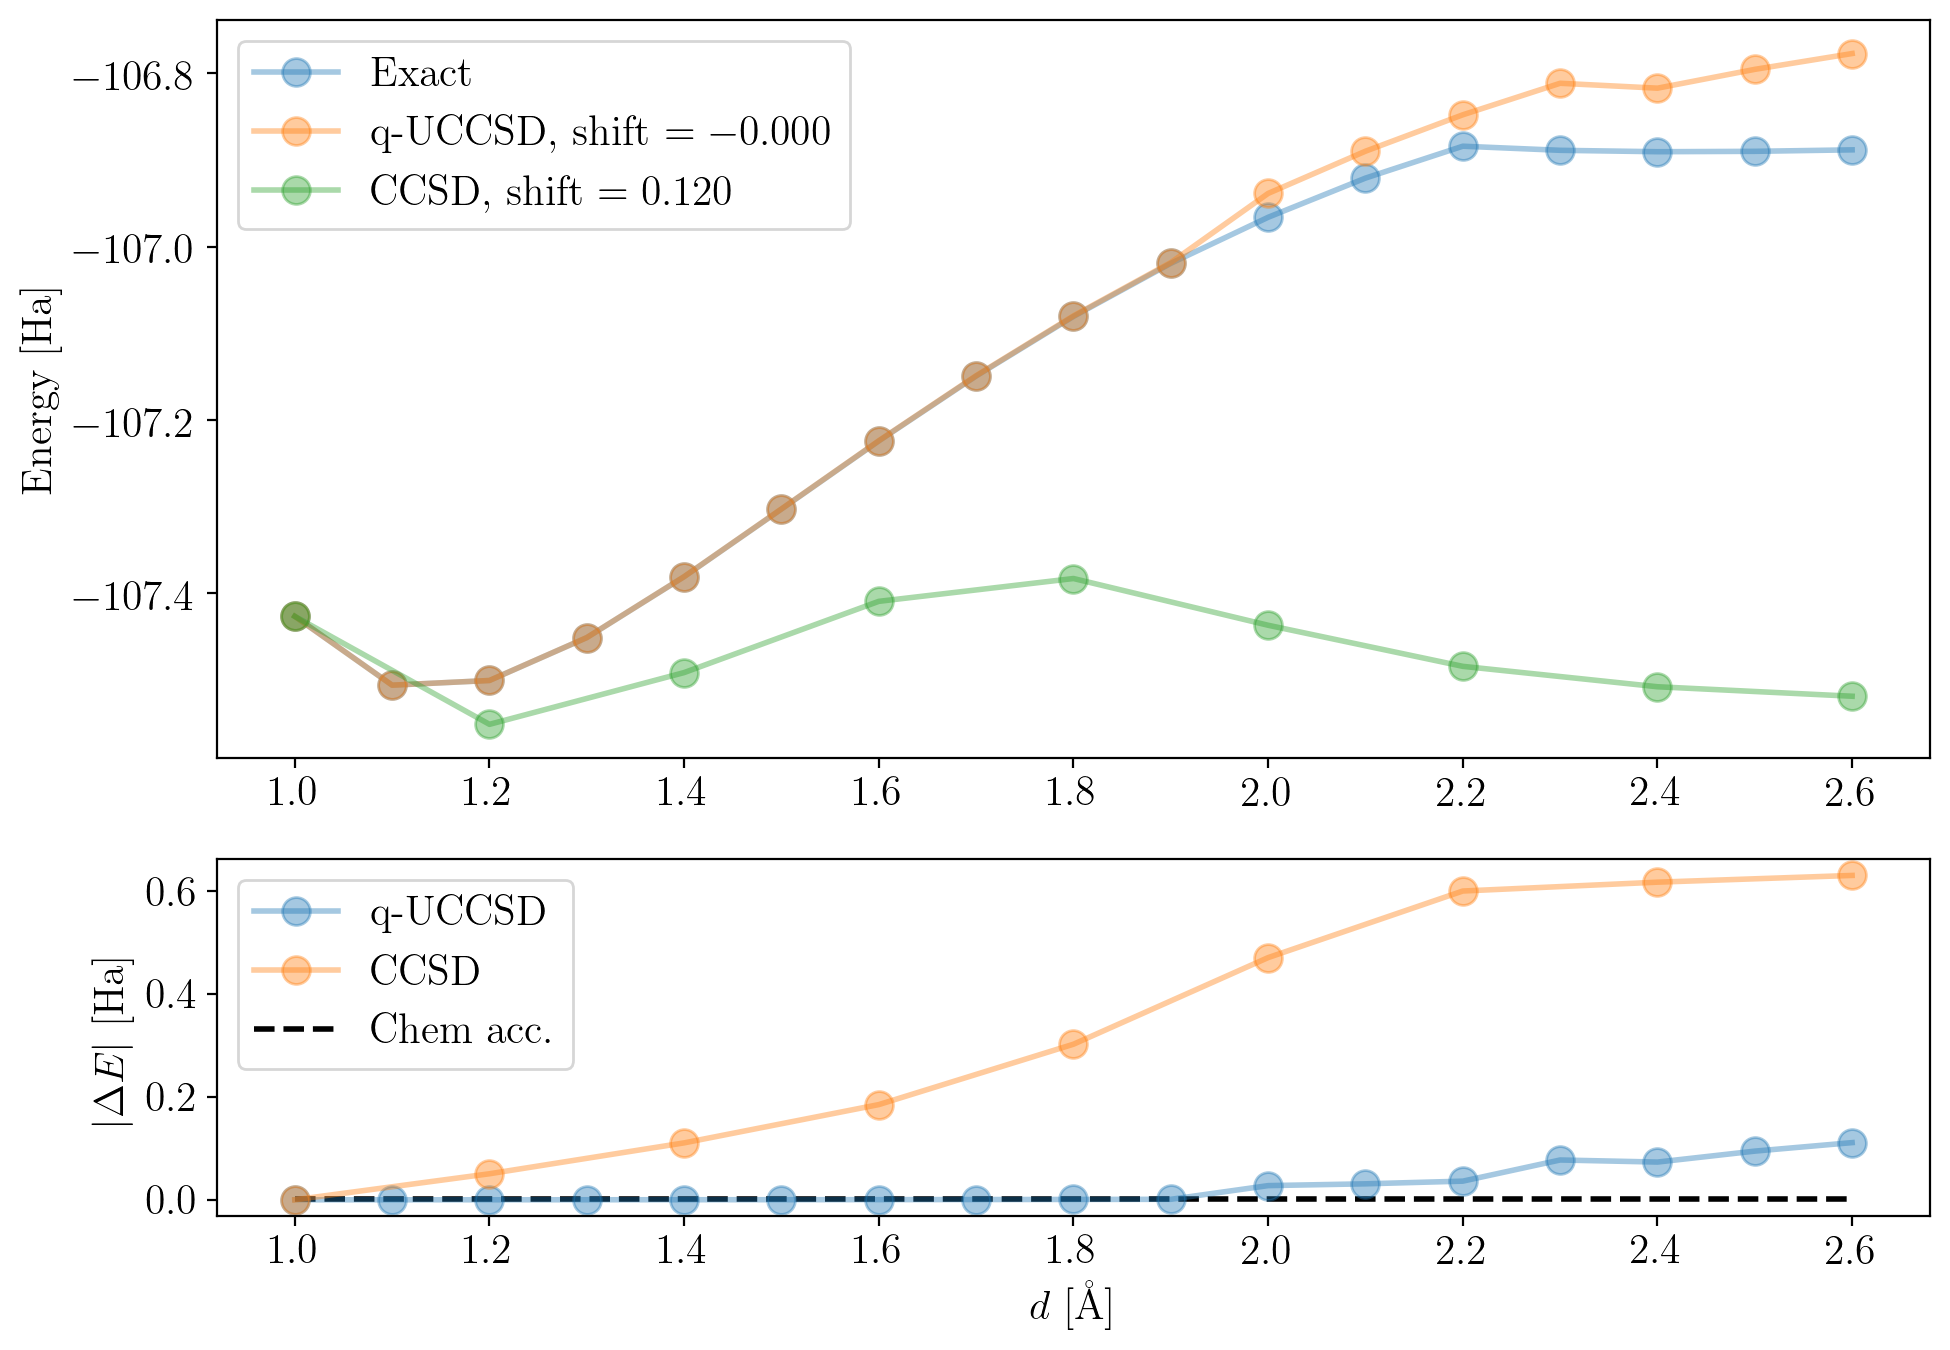

In [3]:
redo_calculations = False
save_calculations = False


if redo_calculations:
    distances_N2 = np.arange(1.0, 2.6, 0.1)
    # Here we do not remove any non-core orbitals
    exact_energies_N2 = get_exact_energies_N2(distances_N2, driver, remove_list=[])
    # Here we remove four of the orbitals with the highest energy
    VQE_energies_N2 = get_VQE_energies_N2(distances_N2, backend, driver, remove_list=[-2,-3])
    distances_ccsd_N2 = np.arange(1.0, 2.6, 0.2)
    try:
        from quantum_chem_psi4_N2 import get_ccsd_energies_N2
        ccsd_energies_N2 = get_ccsd_energies_N2(distances_ccsd_N2, print_info=True)
    except:
        "Could not import the openfermion library"
        distances_ccsd_N2 = np.genfromtxt("data/distances_ccsd_N2.csv", delimiter=",")
        ccsd_energies_N2 = np.genfromtxt("data/distances_ccsd_N2.csv", delimiter=",")
    if save_calculations:
        np.savetxt("data/distances_N2.csv", distances_N2, delimiter=",")
        np.savetxt("data/exact_energies_N2.csv", exact_energies_N2, delimiter=",")
        np.savetxt("data/VQE_energies_N2.csv", VQE_energies_N2, delimiter=",")
        np.savetxt("data/distances_ccsd_N2.csv", distances_ccsd_N2, delimiter=",")
        np.savetxt("data/ccsd_energies_N2.csv", ccsd_energies_N2, delimiter=",")
else:
    distances_N2 = np.genfromtxt("data/distances_N2.csv", delimiter=",")
    exact_energies_N2 = np.genfromtxt("data/exact_energies_N2.csv", delimiter=",")
    VQE_energies_N2 = np.genfromtxt("data/VQE_energies_N2.csv", delimiter=",")
    distances_ccsd_N2 = np.genfromtxt("data/distances_ccsd_N2.csv", delimiter=",")
    ccsd_energies_N2 = np.genfromtxt("data/ccsd_energies_N2.csv", delimiter=",")

plot_accuracy(ccsd_energies_N2, VQE_energies_N2, exact_energies_N2, distances_N2, distances_ccsd_N2)

The results presented in the figure above are qualitatively not dependent on the which non-frozen orbitals that is removed. In the case above, we removed two orbitals (each with spin degeneracy and high energy). If no orbitals are removed, we are working with with 10 electrons and 16 orbitals. Calculating the exact ground state energy for this is possible, and reproduces the results from [[1]](#rsc). However, the VQE algorithm grows exponentially with the number of orbitals, and currently we are unable to run the simulations without removing at least 2 orbitals (2 orbitals, each with a spin-degeneracy).

It is observed that the exact curve and the q-UCCSD curve coincide until $d =2.0$ Å, with the error being well below chemical accuracy. If no orbitals are removed in the exact calculations, and four orbitals are removed in the q-UCCSD simulation, only the qualitative behavior of the two are similar, but the error is far higher than chemical accuracy.

The dominance of the q-UCCSD algorithm should however, be taken with a grain of salt as the CCSD algorithm does not remove any orbitals, and it is likely that this is the main reason for the large deviance from the exact result. Still, the main takeaway is that the quantum UCCSD algorithm does not have a new energy minima for $d>1.2$ Å, while the CCSD algorithm does, regardless of how many orbitals that are removed. This illustrates the potential of the quantum algorithm, as the additional computational cost arising from more electrons should be manageable (Even within the confines of the NISQ paradigm). 

<a id="rsc"></a>
## References
<a>[1]</a>: Igor O. Sokolov et. al., *Quantum Orbital-Optimized Unitary Coupled Cluster Methods in the Strongly Correlated Regime: Can Quantum Algorithms Outperform their Classical Equivalents*, 2019. <br />